In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA
import seaborn as sns
%matplotlib inline
sns.set()

# Loading and Scaling the Dataset

In [157]:
#column names, convert them into list of strings
names="query acc.ver, subject acc.ver, % identity, alignment length, mismatches, gap opens, q. start, q. end, s. start, s. end, evalue, bit score"
col=names.replace(" ","").split(",")
col

['queryacc.ver',
 'subjectacc.ver',
 '%identity',
 'alignmentlength',
 'mismatches',
 'gapopens',
 'q.start',
 'q.end',
 's.start',
 's.end',
 'evalue',
 'bitscore']

In [158]:
#loading the data from file
data=pd.read_csv('gene_dataset.csv',names=col)
data.head()

,queryacc.ver,subjectacc.ver,%identity,alignmentlength,mismatches,gapopens,q.start,q.end,s.start,s.end,evalue,bitscore
0,MN997409.1,MN997409.1,100.00,29882,0,0,1,29882,1,29882,0.0,55182
1,MN997409.1,MT020881.1,99.99,29882,3,0,1,29882,1,29882,0.0,55166
2,MN997409.1,MT020880.1,99.99,29882,3,0,1,29882,1,29882,0.0,55166
3,MN997409.1,MN985325.1,99.99,29882,3,0,1,29882,1,29882,0.0,55166
4,MN997409.1,MN975262.1,99.99,29882,3,0,1,29882,1,29882,0.0,55166


In [159]:
#datasest for subjectacc.ver column (This information doesn't exist in dataset, hence i have added it manually)
x="40 5 32 3 22 36 31 52 43 6 48 36 54 5 62 59 63 48 45 12 63 43 19 47 22 35 38 57 46 34 36 4 76 58 54 57 21 48 19 65 34 17 0 58 82 60 34 4 24 52 32 0 24 49 49 54 44 24 12 37 52 0 19 27 34 36 51 30 74 37 14 56 62 63 37 43 17 71 53 7 0 45 42 36 20 0 96 33 50 0 0 43 11 74 37 36 31 25 36 62 31 34 37 58 57 9 35 60 29 22 0 59 34 15 47 35 63 0 41 20 43 11 27 14 53 48 32 16 9 40 39 40 40 8 16 74 39 56 42 75 57 19 34 39 16 12 17 68 69 24 13 49 0 29 21 0 56 22 8 62 0 56 49 58 11 23 75 56 25 54 51 21 37 28 57 92 37 20 34 20 24 63 67 43 37 34 49 70 2 42 30 42 38 53 50 56 0 48 50 20 32 16 61 28 37 19 4 1 24 62 59 6 60 90 0 34 52 70 14 28 24 17 55 55 41 74 75 37 31 27 76 17 10 72 43 45 54 37 11 0 43 0 72 53 14 0 26 0 5 12 17 69 35 66 44 33 49 56 34 42 20 1 98".split()
x=[int(i) for i in x]
x_df=pd.DataFrame(x,columns=["subjectacc.ver"])

In [160]:
#dropping the first two columns containing strings
df=data.drop(['queryacc.ver','subjectacc.ver'], axis=1)    
df

,%identity,alignmentlength,mismatches,gapopens,q.start,q.end,s.start,s.end,evalue,bitscore
0,100.000,29882,0,0,1,29882,1,29882,0.0,55182
1,99.990,29882,3,0,1,29882,1,29882,0.0,55166
2,99.990,29882,3,0,1,29882,1,29882,0.0,55166
3,99.990,29882,3,0,1,29882,1,29882,0.0,55166
4,99.990,29882,3,0,1,29882,1,29882,0.0,55166
...,...,...,...,...,...,...,...,...,...,...
258,79.325,1925,357,35,19,1923,3,1906,0.0,1312
259,82.304,17716,2948,169,3956,21577,3868,21490,0.0,15175
260,80.063,5417,988,68,22539,27910,22414,27783,0.0,3936
261,90.189,1641,142,12,28257,29882,28088,29724,0.0,2121


In [244]:
#adding a column
if 'subjectacc.ver' not in df.columns:
    df.insert(0,'subjectacc.ver',x_df,True)
df

,subjectacc.ver,%identity,alignmentlength,mismatches,gapopens,q.start,q.end,s.start,s.end,evalue,bitscore
0,40,100.000,29882,0,0,1,29882,1,29882,0.0,55182
1,5,99.990,29882,3,0,1,29882,1,29882,0.0,55166
2,32,99.990,29882,3,0,1,29882,1,29882,0.0,55166
3,3,99.990,29882,3,0,1,29882,1,29882,0.0,55166
4,22,99.990,29882,3,0,1,29882,1,29882,0.0,55166
...,...,...,...,...,...,...,...,...,...,...,...
258,34,79.325,1925,357,35,19,1923,3,1906,0.0,1312
259,42,82.304,17716,2948,169,3956,21577,3868,21490,0.0,15175
260,20,80.063,5417,988,68,22539,27910,22414,27783,0.0,3936
261,1,90.189,1641,142,12,28257,29882,28088,29724,0.0,2121


#### correlation plot of each feature with all other features

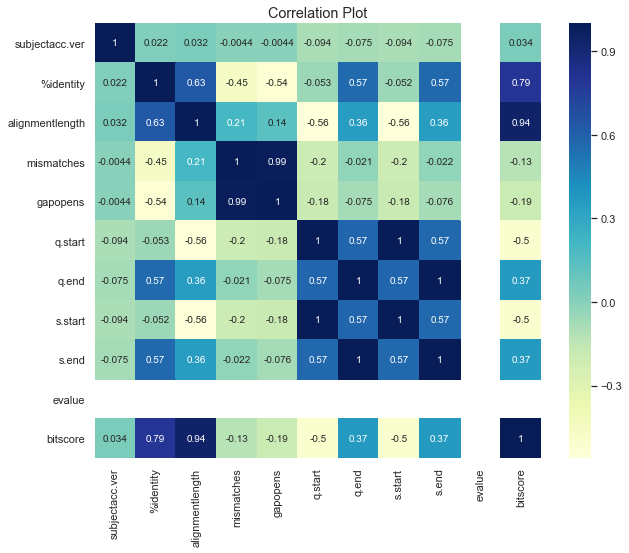

In [246]:
plt.figure(figsize = (10,8))
axt=sns.heatmap(df.corr(), annot=True,cmap="YlGnBu")
bottom, top = axt.get_ylim()
axt.set_ylim(bottom + 0.5, top - 0.5)
axt.set_title('Correlation Plot')
plt.show()

#### Scaling the Dataset

In [163]:
#Scaling the Data using StandardScaler()

scaler=StandardScaler()
scaler.fit(df)
scaled_data=scaler.transform(df)
scaled_data

array([[ 0.15510109,  1.83472331,  1.82390253, ...,  0.75410796,
         0.        ,  2.13347386],
       [-1.44188498,  1.83340668,  1.82390253, ...,  0.75410796,
         0.        ,  2.1326401 ],
       [-0.2099243 ,  1.83340668,  1.82390253, ...,  0.75410796,
         0.        ,  2.1326401 ],
       ...,
       [-0.75746238, -0.79023319, -0.50367772, ...,  0.55607965,
         0.        , -0.53696079],
       [-1.62439767,  0.54298191, -0.86292329, ...,  0.73920159,
         0.        , -0.63154064],
       [ 2.80153515, -0.89003341, -0.83561834, ..., -1.88516873,
         0.        , -0.67369772]])

# Principal Component Analysis
### Finding the number of optimal principal components using explained variance ratio

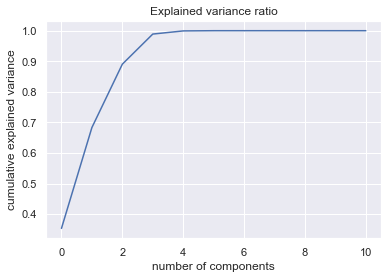

In [164]:
pca_test = PCA().fit(scaled_data)
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title('Explained variance ratio')
plt.show()

### From the above plot 2 components are required to explain at least 90% of our feature variation

In [165]:
#doing pca with 2 components
pca=PCA(n_components=2)
pca.fit(scaled_data)
x_pca=pca.transform(scaled_data)
x_pca  #this is the array containing the two reduced columns by dimensionality reduction

array([[-2.71922876e+00,  2.78366522e+00],
       [-2.76623611e+00,  2.68219680e+00],
       [-2.72884807e+00,  2.76019025e+00],
       [-2.76900559e+00,  2.67641951e+00],
       [-2.74269549e+00,  2.73130379e+00],
       [-2.72338580e+00,  2.77144371e+00],
       [-2.72975539e+00,  2.75717367e+00],
       [-2.70067580e+00,  2.81783523e+00],
       [-2.71313848e+00,  2.79183742e+00],
       [-2.76437394e+00,  2.68495752e+00],
       [-2.70621477e+00,  2.80628065e+00],
       [-2.72290837e+00,  2.77131578e+00],
       [-2.69798301e+00,  2.82331141e+00],
       [-2.76567366e+00,  2.68194835e+00],
       [-2.68674335e+00,  2.84660117e+00],
       [-2.69046200e+00,  2.83792318e+00],
       [-2.68492303e+00,  2.84947776e+00],
       [-2.70543862e+00,  2.80574922e+00],
       [-2.70937097e+00,  2.79735420e+00],
       [-2.75506747e+00,  2.70202889e+00],
       [-2.68396819e+00,  2.84922190e+00],
       [-2.71166303e+00,  2.79144898e+00],
       [-2.74489685e+00,  2.72212148e+00],
       [-2.

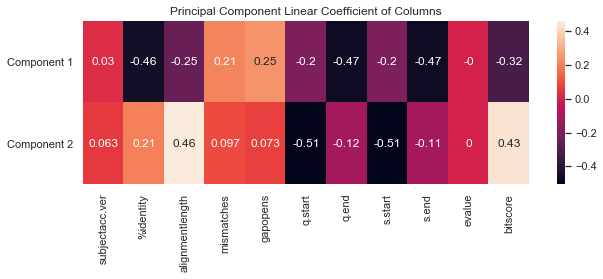

In [247]:
# Correlation between the two principal components and original features
sns.set()
plt.figure(figsize=(10,3))
tx=sns.heatmap(pca.components_, annot=True)
y_axis=["Component {}".format(i) for i in range(1,3)]
tx.set_xticklabels(col[1:],rotation=90)
tx.set_yticklabels(y_axis,rotation=360)
bottom, top = tx.get_ylim()
tx.set_ylim(bottom + 0.5, top - 0.5)
tx.set_title('Principal Component Linear Coefficient of Columns')
plt.show()

### While plotting the two pca components on a scatter plot we can see the visible clusters

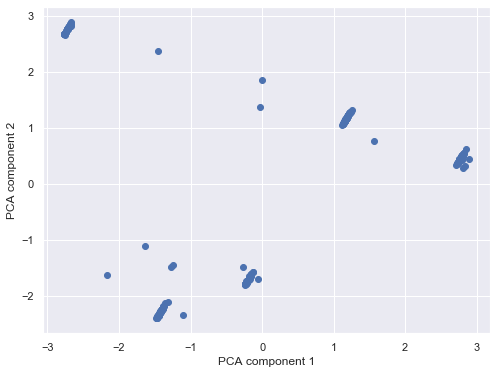

In [168]:
#plotting the scaled and reduced dataset to see any visible cluster 
sns.set()
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1])
plt.xlabel('PCA component 1')
plt.ylabel('PCA component 2')
plt.show()

# Finding number of clusters using silhouette method




In [169]:
range_n_clusters = list(range(2,10))
scores=[]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(df)
    centers = clusterer.cluster_centers_
    score = silhouette_score(df, preds)
    scores.append(score)
    print("For number of clusters = {}, silhouette score is {})".format(n_clusters, score))

For number of clusters = 2, silhouette score is 0.6051204113808788)
For number of clusters = 3, silhouette score is 0.7737058290978492)
For number of clusters = 4, silhouette score is 0.9303378316446527)
For number of clusters = 5, silhouette score is 0.962421484232318)
For number of clusters = 6, silhouette score is 0.9623043841348993)
For number of clusters = 7, silhouette score is 0.9612786772197122)
For number of clusters = 8, silhouette score is 0.9610617201981808)
For number of clusters = 9, silhouette score is 0.9621776162957929)


### In the below plot we can clearly see silhouette score doesn't increase much after cluster 5

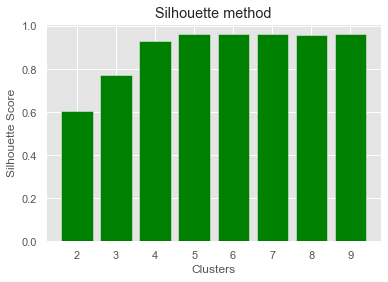

In [170]:
plt.style.use('ggplot')
x_pos=[i for i in range(2,10)]
plt.bar(x_pos, scores, color='green')
plt.xlabel("Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette method")
plt.show()

# K-Means
### From silhouette method we know that the number of clusters are 5

In [250]:
#applying k means provided by scikit-learn library on pca data
kmeans = KMeans(n_clusters=5)
y_kmeans = kmeans.fit_predict(x_pca)
print(y_kmeans)
# these are the assigned clusters to each row using k means

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 0 0 1 0 1 0 1 1 3 0 4 1 3 0 4 1 3 0 4 1 3 0 4 1 3 0 4 1 3
 0 4 1 3 0 4 1 3 0 4 1 3 0 4 1 3 0 4 1 3 0 4 1 3 0 4 1 3 0 4 1 3 0 4 1 3 4
 1 3 0 4 1 3 0 4 1 3 0 4 1 3 0 4 1 3 0 4 1 3 0 4 1 3 0 4 1 3 0 4 1 3 0 4 1
 3 0 4 1 3 0 4 1 3 0 4 1 3 0 4 1 3 0 4 1 3 0 4 1 3 0 4 1 3 0 4 1 3 0 4 1 3
 0 4 1 3 0 4 1 3 0 4 1 3 0 4 1 3 0 4 1 3 0 4 1 3 0 4 1 3 0 4 1 3 0 4 1 3 0
 4 1 3 0 4 1 3 0 4 1 3 0 4 1 3 0 4 1 3 0 4 1 3 0 4 1 3 0 4 1 3 0 4 1 3 0 4
 1 3 0 4]


In [249]:
centers=kmeans.cluster_centers_
centers
# these are the centers of 5 clusters

array([[ 2.77611695,  0.44840622],
       [-0.1886606 , -1.69509984],
       [-2.690332  ,  2.76611879],
       [ 1.14191711,  1.18242393],
       [-1.42888579, -2.2252915 ]])

In [182]:

#applying k meeans on the original data with full features(data without the dimensionality reduction)
h_kmeans = KMeans(n_clusters=5)
h_y_kmeans = kmeans.fit_predict(scaled_data)
print(h_y_kmeans)
higher_centers=kmeans.cluster_centers_
higher_centers              # centers with higher dimensional features

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 1 1 0 1 0 1 3 0 4 1 3 0 4 1 3 0 4 1 3 0 4 1 3 0 4 1 3 0 4
 1 3 0 4 1 3 0 4 1 3 0 4 1 3 0 4 1 3 0 4 1 3 0 4 1 3 0 4 1 3 0 4 1 3 0 4 3
 0 4 1 3 0 4 1 3 0 4 1 3 0 4 1 3 0 4 1 3 0 4 1 3 0 4 1 3 0 4 1 3 0 4 1 3 0
 4 1 3 0 4 1 3 0 4 1 3 0 4 1 3 0 4 1 3 0 4 1 3 0 4 1 3 0 4 1 3 0 4 1 3 0 4
 1 3 0 4 1 3 0 4 1 3 0 4 1 3 0 4 1 3 0 4 1 3 0 4 1 3 0 4 1 3 0 4 1 3 0 4 1
 3 0 4 1 3 0 4 1 3 0 4 1 3 0 4 1 3 0 4 1 3 0 4 1 3 0 4 1 3 0 4 1 3 0 4 1 3
 0 4 1 3]


array([[ 0.04642308, -0.463023  ,  0.67430804,  1.84486058,  1.76529158,
        -0.61861753, -0.03682817, -0.62200027, -0.03740488,  0.        ,
         0.06676893],
       [-0.04696653,  0.56796253, -0.83626053, -0.70012247, -0.75069005,
         1.38350189,  0.73662756,  1.38332567,  0.7318916 ,  0.        ,
        -0.60999776],
       [ 0.08919373,  1.83147563,  1.80569078, -0.84291272, -0.95326718,
        -0.94092325,  0.72653413, -0.93891891,  0.7359226 ,  0.        ,
         2.11303512],
       [ 0.12130244, -0.87034986, -0.83282055, -0.5164442 , -0.39960225,
        -0.93962594, -1.88231555, -0.93860595, -1.88195754,  0.        ,
        -0.67082587],
       [-0.19787157, -0.78787072, -0.50075712,  0.06714313,  0.1777953 ,
         0.9364001 ,  0.56085679,  0.93735566,  0.55812318,  0.        ,
        -0.53536603]])

In [252]:
# creating a dataframe of the two pca components and their assigned clusters
x=kmeans.labels_
x=pd.DataFrame(x,columns=['cluster'])
temp=pd.DataFrame(x_pca,columns = ['Component 1', 'Component 2'])
temp=pd.concat([temp.reset_index(drop=True), x], axis=1)
temp

,Component 1,Component 2,cluster
0,-2.719229,2.783665,2
1,-2.766236,2.682197,2
2,-2.728848,2.760190,2
3,-2.769006,2.676420,2
4,-2.742695,2.731304,2
...,...,...,...
258,2.764165,0.435116,4
259,1.183517,1.185487,1
260,-0.204768,-1.734290,3
261,-1.475821,-2.386083,0


# Visualization
### correlation between cluster centers and features

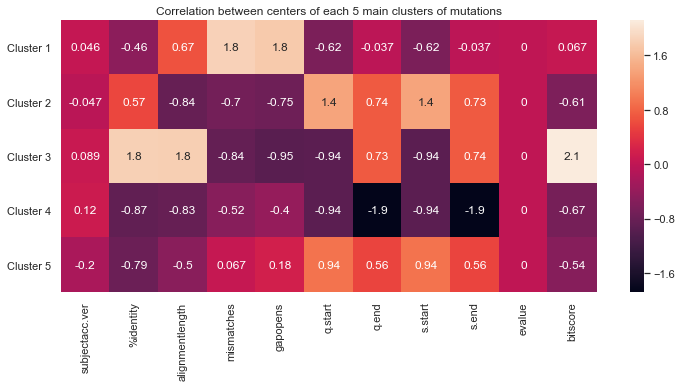

In [251]:
x_axis=col[1:]
y_axis=["Cluster {}".format(i) for i in range(1,6)]
plt.figure(figsize = (12,5))
ax=sns.heatmap(higher_centers, 
               annot=True,
               xticklabels=x_axis,
               yticklabels=y_axis)
ax.set_yticklabels(y_axis,rotation=360)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_title('Correlation between centers of each 5 main clusters of mutations')
plt.show()

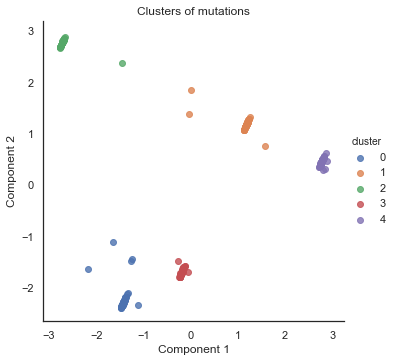

In [253]:
# This is the plot of clearly visible 5 clusters, also assigned colors using the cluster number got from kmeans
sns.set_style('white')
sns.lmplot(data=temp, x='Component 1', y='Component 2', hue='cluster', fit_reg=False, legend=True, legend_out=True)
plt.title('Clusters of mutations')
plt.show()

#### Conclusion: Using K-Means and PCA, were able to identify five main clusters of mutations in the coronavirus. Scientists developing vaccines for the coronavirus can use the cluster centers to gain knowledge about characteristics of each cluster.

# K-means from the scratch

In [204]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

class c_KMeans():

    def __init__(self, K=5, max_iters=200, plot_steps=False):
        self.K = K
        self.max_iters = max_iters
        self.plot_steps = plot_steps

        # list of sample indices for each cluster
        self.clusters = [[] for _ in range(self.K)]
        # the centers (mean feature vector) for each cluster
        self.centroids = []

    def predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape
        
        # initialize 
        random_sample_idxs = np.random.choice(self.n_samples, self.K, replace=False)
        self.centroids = [self.X[idx] for idx in random_sample_idxs]

        # Optimize clusters
        for _ in range(self.max_iters):
            # Assign samples to closest centroids (create clusters)
            self.clusters = self._create_clusters(self.centroids)
            
            if self.plot_steps:
                self.plot()

            # Calculate new centroids from the clusters
            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)
            
            # check if clusters have changed
            if self._is_converged(centroids_old, self.centroids):
                break

            if self.plot_steps:
                self.plot()

        # Classify samples as the index of their clusters
        return self._get_cluster_labels(self.clusters)


    def _get_cluster_labels(self, clusters):
        # each sample will get the label of the cluster it was assigned to
        labels = np.empty(self.n_samples)

        for cluster_idx, cluster in enumerate(clusters):
            for sample_index in cluster:
                labels[sample_index] = cluster_idx
        return labels

    def _create_clusters(self, centroids):
        # Assign the samples to the closest centroids to create clusters
        clusters = [[] for _ in range(self.K)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self._closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters

    def _closest_centroid(self, sample, centroids):
        # distance of the current sample to each centroid
        distances = [euclidean_distance(sample, point) for point in centroids]
        closest_index = np.argmin(distances)
        return closest_index

    def _get_centroids(self, clusters):
        # assign mean value of clusters to centroids
        centroids = np.zeros((self.K, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        return centroids

    def _is_converged(self, centroids_old, centroids):
        # distances between each old and new centroids, fol all centroids
        distances = [euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)]
        return sum(distances) == 0

    def plot(self):
        fig, ax = plt.subplots(figsize=(12, 8))

        for i, index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point)

        for point in self.centroids:
            ax.scatter(*point, marker="x", color='black', linewidth=2)

        plt.show()
            



[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 4. 4. 0.
 4. 0. 4. 0. 0. 3. 4. 2. 0. 3. 4. 2. 0. 3. 4. 2. 0. 3. 4. 2. 0. 3. 4. 2.
 0. 3. 4. 2. 0. 3. 4. 2. 0. 3. 4. 2. 0. 3. 4. 2. 0. 3. 4. 2. 0. 3. 4. 2.
 0. 3. 4. 2. 0. 3. 4. 2. 0. 3. 4. 2. 0. 3. 2. 0. 3. 4. 2. 0. 3. 4. 2. 0.
 3. 4. 2. 0. 3. 4. 2. 0. 3. 4. 2. 0. 3. 4. 2. 0. 3. 4. 2. 0. 3. 4. 2. 0.
 3. 4. 2. 0. 3. 4. 2. 0. 3. 4. 2. 0. 3. 4. 2. 0. 3. 4. 2. 0. 3. 4. 2. 0.
 3. 4. 2. 0. 3. 4. 2. 0. 3. 4. 2. 0. 3. 4. 2. 0. 3. 4. 2. 0. 3. 4. 2. 0.
 3. 4. 2. 0. 3. 4. 2. 0. 3. 4. 2. 0. 3. 4. 2. 0. 3. 4. 2. 0. 3. 4. 2. 0.
 3. 4. 2. 0. 3. 4. 2. 0. 3. 4. 2. 0. 3. 4. 2. 0. 3. 4. 2. 0. 3. 4. 2. 0.
 3. 4. 2. 0. 3. 4. 2. 0. 3. 4. 2. 0. 3. 4. 2. 0. 3. 4. 2. 0. 3. 4. 2.]


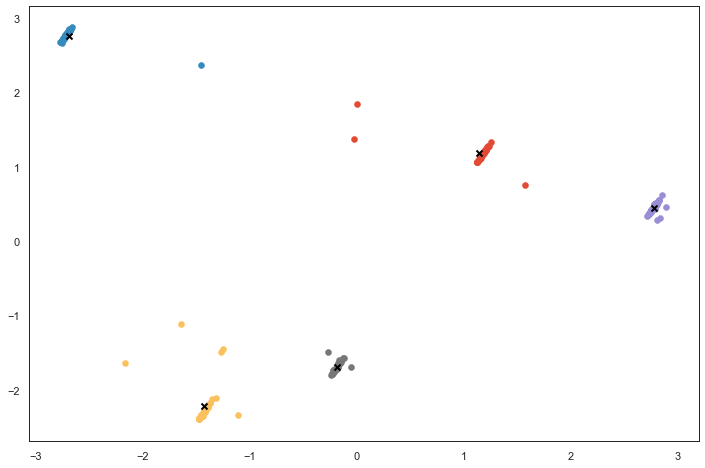

In [205]:
# plotting the points and assigning them clusters
k=c_KMeans()
y_pred=k.predict(x_pca)
print(y_pred)
k.plot()

#### Conclusion: The scatter plot looks the same as we got from kmeans scikit-learn, hence our manually written algorithm works fine.

### comparing the size of clusters in scikit-learn provided algorithm and manually done k means algorithm

In [206]:
from collections import Counter, defaultdict
print(Counter(kmeans.labels_))
print(Counter(y_pred))

Counter({1: 56, 0: 55, 3: 54, 4: 53, 2: 45})
Counter({4.0: 56, 0.0: 56, 3.0: 53, 2.0: 53, 1.0: 45})


# Classification using K nearest neighbour
### Making the dataset by concatening the clusters found using k-means


In [209]:
df  # this is the original dataset we need to add an additional column of assigned cluster number

,subjectacc.ver,%identity,alignmentlength,mismatches,gapopens,q.start,q.end,s.start,s.end,evalue,bitscore
0,40,100.000,29882,0,0,1,29882,1,29882,0.0,55182
1,5,99.990,29882,3,0,1,29882,1,29882,0.0,55166
2,32,99.990,29882,3,0,1,29882,1,29882,0.0,55166
3,3,99.990,29882,3,0,1,29882,1,29882,0.0,55166
4,22,99.990,29882,3,0,1,29882,1,29882,0.0,55166
...,...,...,...,...,...,...,...,...,...,...,...
258,34,79.325,1925,357,35,19,1923,3,1906,0.0,1312
259,42,82.304,17716,2948,169,3956,21577,3868,21490,0.0,15175
260,20,80.063,5417,988,68,22539,27910,22414,27783,0.0,3936
261,1,90.189,1641,142,12,28257,29882,28088,29724,0.0,2121


In [231]:
#concatenating the cluster column we got from k means 
new=pd.concat([df.reset_index(drop=True), pd.DataFrame(y_kmeans,columns=['cluster'])], axis=1)
#converting into an array
new=new.values
new

array([[4.0000e+01, 1.0000e+02, 2.9882e+04, ..., 0.0000e+00, 5.5182e+04,
        2.0000e+00],
       [5.0000e+00, 9.9990e+01, 2.9882e+04, ..., 0.0000e+00, 5.5166e+04,
        2.0000e+00],
       [3.2000e+01, 9.9990e+01, 2.9882e+04, ..., 0.0000e+00, 5.5166e+04,
        2.0000e+00],
       ...,
       [2.0000e+01, 8.0063e+01, 5.4170e+03, ..., 0.0000e+00, 3.9360e+03,
        4.0000e+00],
       [1.0000e+00, 9.0189e+01, 1.6410e+03, ..., 0.0000e+00, 2.1210e+03,
        0.0000e+00],
       [9.8000e+01, 7.9305e+01, 1.9280e+03, ..., 0.0000e+00, 1.3120e+03,
        3.0000e+00]])

In [223]:
# k nearest neighbour algorithm from scratch

from math import sqrt
 
# calculate the Euclidean distance between two vectors
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)-1):
        distance += (row1[i] - row2[i])**2
    return sqrt(distance)
 
# Locate the most similar neighbors
def get_neighbors(train, test_row, num_neighbors):
    distances = list()
    for train_row in train:
        dist = euclidean_distance(test_row, train_row)
        distances.append((train_row, dist))
    distances.sort(key=lambda tup: tup[1])
    neighbors = list()
    for i in range(num_neighbors):
        neighbors.append(distances[i][0])
    return neighbors
 
# Make a classification prediction with neighbors
def predict_classification(train, test_row, num_neighbors):
    neighbors = get_neighbors(train, test_row, num_neighbors)
    output_values = [row[-1] for row in neighbors]
    prediction = max(set(output_values), key=output_values.count)
    return prediction

In [240]:
# making prediction by picking any random row from the dataset
import random
row_vector=random.randint(0,263)  #selected any random row
prediction = predict_classification(new, new[row_vector], 3)
print('Expected cluster %d, Got %d.' % (new[row_vector][-1], prediction))

# if the expected cluster is same as predicted cluster then our algorithm works fine

Expected cluster 4, Got 4.
